    As a popular saying goes, One bad apple can spoil the bunch This phrase refers to the scenario when negative/undesirable qualities in one person start rubbing off on other people in a group. Today we are going to simulate an experiment with apples to see if one bad apple can literally take over the whole basket!

   Almost every system comprising of living beings, has a birth-death process to maintain the balance. The natural process of dying by old age, is just one of the causes of death, amongst several other causes that can happen anywhere anytime at random. Let's assume that system is a basket of apples. Also, since the basket has limited space, we want to have fixed number of apples in it at any point in time. Furthermore, we act as god and interact with this system regularly, choosing randomly whether to eliminate a bad or a good apple, and randomly substitute a bad/good apple in its place. For people concerned about apples, let's say I have access to unlimited bad and good apples, so I won't face a dearth of either during substitutions. Such a process, is called a **Moran Process**.

   Let's say initially we have **one bad apple**, and **N-1 good apples** in the basket. We want to estimate the chances that finally, the basket will consist of only bad apples. Note that, our process ends when either the basket consists of only bad apples or only good apples.

In [2]:
import numpy as np
def replace_apple(N=10, i=1, seed=0):
    basket = ['bad' for ctr in range(i)] + ['good' for ctr in range(N-i)]
    states = []
    states.append([i, N-i])
    np.random.seed(seed)
    while(len(set(basket)) != 1):
        substituting_index = np.random.randint(N)
        substituted_index = np.random.randint(N)
        basket[substituted_index] = basket[substituting_index]
        states.append([basket.count('bad'), basket.count('good')])
    return states

Let's try to run this method for default values.

[[24, 26], [24, 26], [23, 27], [23, 27], [24, 26], [25, 25], [25, 25], [26, 24], [26, 24], [26, 24], [27, 23], [27, 23], [28, 22], [28, 22], [28, 22], [28, 22], [28, 22], [27, 23], [27, 23], [28, 22], [28, 22], [28, 22], [29, 21], [29, 21], [29, 21], [29, 21], [29, 21], [29, 21], [29, 21], [29, 21], [30, 20], [31, 19], [32, 18], [31, 19], [31, 19], [30, 20], [30, 20], [30, 20], [31, 19], [30, 20], [30, 20], [31, 19], [32, 18], [31, 19], [31, 19], [31, 19], [32, 18], [32, 18], [33, 17], [32, 18], [32, 18], [33, 17], [33, 17], [32, 18], [33, 17], [34, 16], [34, 16], [34, 16], [34, 16], [34, 16], [34, 16], [35, 15], [36, 14], [36, 14], [36, 14], [35, 15], [35, 15], [36, 14], [36, 14], [35, 15], [35, 15], [34, 16], [34, 16], [33, 17], [33, 17], [33, 17], [34, 16], [33, 17], [32, 18], [33, 17], [34, 16], [34, 16], [35, 15], [36, 14], [36, 14], [36, 14], [36, 14], [36, 14], [37, 13], [37, 13], [36, 14], [35, 15], [36, 14], [35, 15], [34, 16], [34, 16], [34, 16], [34, 16], [33, 17], [32, 18],

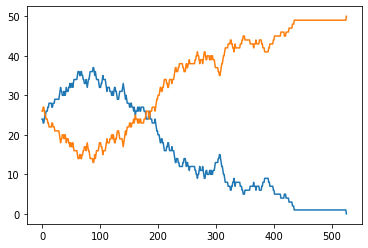

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

states = replace_apple(N=50, i=24, seed=6)
print(states)
plt.plot(states)

Now we want to iterate the with **replace_apple** process multiple times to sort of get an idea of average behavior of the system.

In [4]:
def estimate_probability(N,iterations=10):
    takeover_count = 0
    for seed in range(iterations):
        final_states = replace_apple(N=N,seed=seed)
        # See if final state consists of only 'bad' apples
        if final_states[-1][1] == 0:
            takeover_count += 1
    
    return takeover_count / iterations , takeover_count

[]

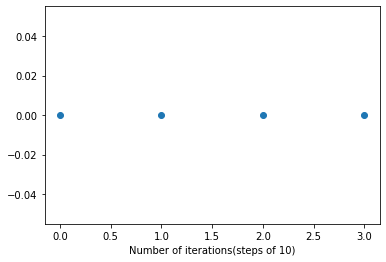

In [5]:
N = 100 
probabilities = [estimate_probability(N,10*exp)[1] for exp in range(1,5)]
plt.scatter(range(4), probabilities)
plt.xlabel('Number of iterations(steps of 10)')
plt.plot()

[]

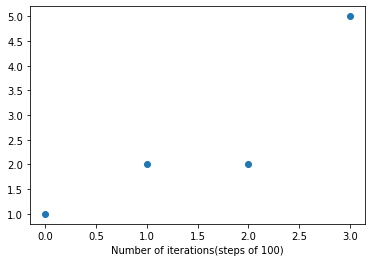

In [6]:
N = 100 
probabilities = [estimate_probability(N,100*exp)[1] for exp in range(1,5)]
plt.scatter(range(4), probabilities)
plt.xlabel('Number of iterations(steps of 100)')
plt.plot()

As we can see, as the number of iterations increase, the possibility of bad apples dominating rises as well. Lets visualize the affect of both increase in N and the number of iterations on the possibility of the bad apple runining all others, in more technical terms, known as **fixation probability for a Moran process with neutral drift**. 

In [7]:
from IPython.display import clear_output, HTML, Image
from matplotlib import animation, rc

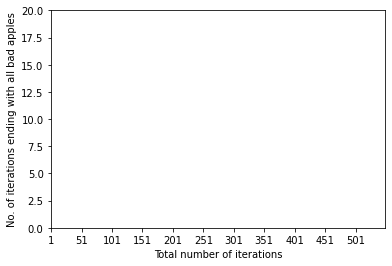

In [29]:
fig, ax = plt.subplots()
ax.set_ylim((0, 20))
ax.set_xlim((0, 550))
ax.set_xticks(range(1,550,50))
pts, = ax.plot([],[])
plt.xlabel('Total number of iterations')
plt.ylabel('No. of iterations ending with all bad apples')

# initialization function: plot the background of each frame
def init():
    pts.set_data([], [])
    return (pts,)

# animation function. This is called sequentially
def animate(N):
    x = range(1,550,50)
    y = [estimate_probability(N,step)[1] for step in range(1,550,50)]
    pts.set_data(x, y)
    ax.title.set_text(f'Total Apples={N}')
    return (pts,)

probab_anim = animation.FuncAnimation(fig, animate, init_func=init, frames=range(100,150), interval=1000, blit=True, repeat=False)

# Have already installed magick from source

In [32]:
rc('animation', html='html5')
probab_anim.save('probab_anim.gif',fps=1)

**Conclusion:**
As we can see:
1. With increase in total number of apples in the basket(number of iterations fixed), the number of takeovers increase more often than not.
2. With increase in number of iterations keeping total number of apples fixed, the number of takeovers always increase.
3. We observe from the visualization that the number of takeovers has a ceiling of 10 from N=1 till N=501, so **at best there's a 10/501 ~= 2% chance that one bad apple can indeed spoil the whole bunch**. This percentage varies as we vary N and iterate more/less.